University of Tuebingen \
DataLiteracy course -  Group Project 2023/2024 \
Authors: Johannes Bertram, Felix Böhm, Nadja Buttke, Fabian Morelli 

# Project Figures for Visualizing mean delays

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import sys

from tueplots import bundles
from tueplots.constants.color import rgb

cwd = os.getcwd()
REPO_ROOT = os.path.realpath(os.path.join(cwd, os.pardir))
sys.path.insert(1, os.path.join(REPO_ROOT, 'src'))
from plotting_functions import read_data, get_mean_delays

## Import data

In [4]:
df_dict = read_data('../dat/gain-comparison/avg_gain')
cities = list(df_dict.keys())
cities.sort()

Potsdam Hbf
Dortmund Hbf
Duesseldorf Hbf
Koeln Hbf
Nuernberg Hbf
Berlin Hbf
Essen Hbf
Karlsruhe Hbf
Schwerin Hbf
Hamburg Hbf
Erfurt Hbf
Magdeburg Hbf
Wiesbaden Hbf
Bremen Hbf
Muenchen Hbf
Hannover Hbf
Stuttgart Hbf
Saarbruecken Hbf
Kiel Hbf
Mainz Hbf
Leipzig Hbf
Duisburg Hbf
Dresden Hbf


In [5]:
df_mean_delays = get_mean_delays(df_dict)['avg_gain']
switch_times_array = list(range(1,61,1))
df_mean_delays["switch_times"] = switch_times_array

## Mean Delay for each switch time

## Mean delay at destination

In [6]:
empty = pd.DataFrame(columns=cities, index=cities)

# Data processing

df_mean = empty.copy()
df_median = empty.copy()

for key, df in df_dict.items():
    #print(key)
    #display(df.head(2))
    df["meanDelay"] =df["delay"].apply(np.mean)
    df["medianDelay"] = df["delay"].apply(np.median)
    array_mean = df["delay"].apply(np.nanmean).round()
    array_median = df["delay"].apply(np.median)
    #print(key)
    #print(key, array_mean)
    df_mean.loc[key] = array_mean
    df_median.loc[key] = array_median
    

    #break

df_mean = df_mean.fillna(np.nan)

/Users/Nadja/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/Nadja/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/Nadja/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/Nadja/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/Nadja/anaconda3/lib/python3.11/site-packages/pandas/core/algorithms.py:1814: RuntimeWarning: Mean of empty slice
  return lib.map_infer(values, mapper, convert=convert)
/Users/Nadja/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  retur

In [7]:
df_mean.drop('Potsdam Hbf', inplace=True)
del df_mean['Potsdam Hbf']

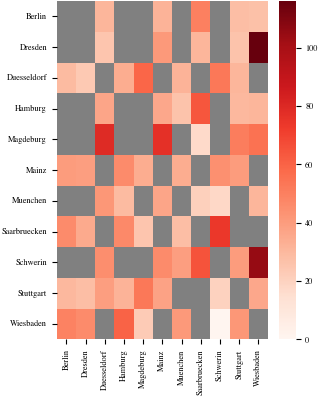

In [8]:
plt.rcParams.update(bundles.icml2022(column="half", nrows=2, ncols=1, usetex=False))
#plt.rcParams['font.serif'] = 'Times New Roman'  # Or another available font
#plt.rcParams['font.family'] = 'serif'
#nan_color = 'lightgrey'

state_capitals = [
    "Berlin Hbf", "Hamburg Hbf", "Muenchen Hbf", "Stuttgart Hbf", 
    "Duesseldorf Hbf", "Mainz Hbf", "Wiesbaden Hbf", "Saarbruecken Hbf", 
    "Schwerin Hbf", "Dresden Hbf", "Magdeburg Hbf", 
]

cleaned_capitals = [city.replace(' Hbf', '') for city in state_capitals]

df_mean.index = df_mean.index.str.replace(' Hbf', '')
df_mean.columns = df_mean.columns.str.replace(' Hbf', '')

df_filtered = df_mean.loc[cleaned_capitals, cleaned_capitals]

df_done = df_filtered.sort_index().sort_index(axis=1)
plt.figure()

#palette = sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True)
#data_sorted = sorted(set( list(filter(lambda x: not np.isnan(x), df_mean.values.flatten()))), reverse=True)
#second_highest = data_sorted[1]
#min_data = data_sorted[-1]

cmap = sns.color_palette("Reds", as_cmap=True)
cmap.set_bad('gray')  # Set color for NaN values

# Plot the heatmap

heatmap = sns.heatmap(df_done, annot=False, cmap=cmap, cbar=True, 
                      vmin=0, vmax=df_mean.max().max())  # , vmin=0, vmax=second_highest

#cbar = heatmap.collections[0].colorbar
#cbar.set_ticks([cbar.vmin, cbar.vmax])


plt.savefig("plot_meanDelay_heatmap_reds.pdf", format="pdf")

plt.show()